In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [25]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [14]:
df=pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [15]:
df.tail()

,Values
104,80.0
105,50.0
106,23.0
107,130.0
108,200.0


**using scatter plot**

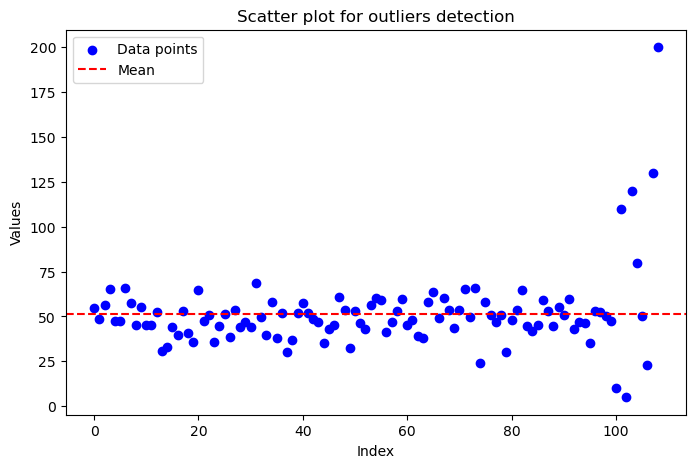

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Scatter plot for outliers detection')
plt.legend()
plt.show()

**using scatter plot**

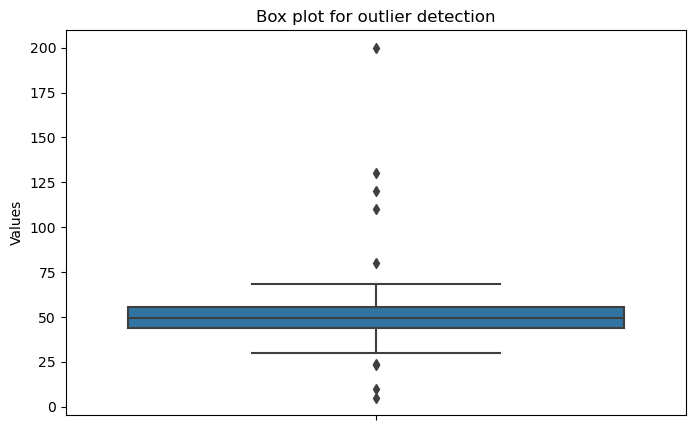

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title('Box plot for outlier detection')
plt.show()

**Using Z Score**

**the Z-Score formula is:**

**z=x-(mean)/(std)**

**steps:**

**1.compute the Z-Score for each data points**

**2.if Z-Score>3 or Z-Score<-3,mark it as an outliers**

In [20]:
df['Z-Score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-Score'].apply(lambda x:'Outlier'if abs(x)> 3 else 'normal')
df[df['Outlier_Z']=='Outlier']

,Values,Z-Score,Outlier_Z
103,120.0,3.173212,Outlier
107,130.0,3.637116,Outlier
108,200.0,6.884448,Outlier


**Using IQR**

**IQR=Q3-Q1**

**STEPS:**
    
    1. Cal Q1(25th percentile) and Q3(75th percentile)
    
    2.compute IQR=Q3-Q1
    
    3. Lower Bound=Q1-1.5*IQR
       Upper Bound=Q3+1.5*IQR
    
    4.ANY VALUE OUTSIDE THESE BOUNDS IS AN OUTLIER

In [33]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
iqr=Q3-Q1
lower=Q1-1.5*iqr
upper=Q3+1.5*iqr
df['Outlier_IQR']=df['Values'].apply(lambda x:'Outlier' if(x<lower or x>upper)else 'Normal')
df[df['Outlier_IQR']=='Outlier']

,Values,Z-Score,Outlier_Z,Outlier_IQR
74,23.802549,-1.289431,normal,Outlier
100,10.000000,-1.929738,normal,Outlier
101,110.000000,2.709307,normal,Outlier
102,5.000000,-2.161690,normal,Outlier
103,120.000000,3.173212,Outlier,Outlier
104,80.000000,1.317594,normal,Outlier
106,23.000000,-1.326662,normal,Outlier
107,130.000000,3.637116,Outlier,Outlier
108,200.000000,6.884448,Outlier,Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:

Min(Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [36]:
q1=np.percentile(data,25)
q2=np.median(data)
q3=np.percentile(data,75)
min_value=np.min(data)
max_value=np.max(data)

In [37]:
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
outliers=data[(data<lower_bound)|(data>upper_bound)]

In [38]:
print(f"5-number summmary:\nMin: {min_value},Q1:{q1},Median(Q2): {q2},Q3:{q3},Max:{max_value}")
print(f"IQR:{IQR}")
print(f"lower bound: {lower_bound},upper bound:{upper_bound}")
print(f"Outliers:{outliers}")

5-number summmary:
Min: 5.0,Q1:43.874401021766715,Median(Q2): 48.73043708220287,Q3:55.00852473036764,Max:120.0
IQR:11.134123708600924
lower bound: 27.17321545886533,upper bound:71.70971029326903
Outliers:[ 23.80254896  10.         110.           5.         120.        ]
